In [2]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data/03B-perfils-com-rfdv-02.csv', index_col=0)

In [4]:
df.head()

,distinct_id,count_eventos,Browser,city,country_code,created,initial_referring_domain,last_seen,os,region,Source,recencia,duracao,frequencia
0,QKK4JVKAB9BFV2yLVoPCccYAmXI9QwRs.88dcefc39941b...,8287,Chrome 84.0,São Paulo,BR,2020-05-08 07:11:46,$direct,2020-07-28 15:34:10,Windows,Sao Paulo,LA Criar Conta,15,81,3
1,1723852f6f284-05818830b468d6-134b3c29-49d40-17...,5793,Chrome 84.0,Sao Jose do Rio Preto,BR,2020-05-21 11:40:59,leads2b.com,2020-08-05 18:35:38,Windows,Sao Paulo,CC CNPJ - Painel de Dados - E-mails,7,76,13
2,1724d0fbffc130-045e6b955db998-d373666-100200-1...,4296,Chrome 83.0,Guarapuava,BR,2020-05-25 12:19:35,$direct,2020-06-05 09:17:50,Windows,Parana,LA Criar Conta,68,10,10
3,SGIRpUNfoHiJMGa2AO7VlWg6mjGlDGHt.27dd4e881e36a...,3668,Chrome 84.0,Londrina,BR,2020-05-11 08:15:58,$direct,2020-08-12 13:35:45,Windows,Parana,LA Criar Conta,0,93,36
4,17231edb3c2d1-023a308ef89129-d373666-1fa400-17...,3403,Chrome 83.0,Salto,BR,2020-05-20 05:52:36,$direct,2020-07-02 17:28:51,Windows,Sao Paulo,LA Criar Conta,41,43,12


In [5]:
df.shape

(8200, 14)

### temos alguns NaN, vamos limpar

In [6]:
df.isna().any()

distinct_id                 False
count_eventos               False
Browser                     False
city                         True
country_code                 True
created                     False
initial_referring_domain    False
last_seen                   False
os                          False
region                       True
Source                      False
recencia                    False
duracao                     False
frequencia                  False
dtype: bool

In [7]:
df.country_code.isnull().sum()
df.region.isnull().sum()
df.city.isnull().sum()

108

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.isna().any()

distinct_id                 False
count_eventos               False
Browser                     False
city                        False
country_code                False
created                     False
initial_referring_domain    False
last_seen                   False
os                          False
region                      False
Source                      False
recencia                    False
duracao                     False
frequencia                  False
dtype: bool

### criar um DataFrame apenas com as features numéricas

In [10]:
df_num = df[['count_eventos', 'recencia', 'duracao', 'frequencia']].copy()

In [11]:
df_num.dtypes

count_eventos    int64
recencia         int64
duracao          int64
frequencia       int64
dtype: object

### fazer normalização das features numéricas com MinMax

In [12]:
x = df_num.values

In [13]:
scaler = MinMaxScaler()

In [14]:
x_scaled = scaler.fit_transform(x)

In [15]:
df_num_nor = pd.DataFrame(x_scaled, columns = df_num.columns)

In [16]:
df_num_nor.head()

,count_eventos,recencia,duracao,frequencia
0,1.000000,0.178571,0.81,0.032258
1,0.699010,0.083333,0.76,0.193548
2,0.518344,0.809524,0.10,0.145161
3,0.442554,0.000000,0.93,0.564516
4,0.410572,0.488095,0.43,0.177419


### transformar as features categóricas em numéricas com One-hot

In [17]:
df_cat = df[['country_code', 'region', 'city', 'Browser', 'os', 'initial_referring_domain', 'Source']].copy()

In [18]:
df_cat.head()

,country_code,region,city,Browser,os,initial_referring_domain,Source
0,BR,Sao Paulo,São Paulo,Chrome 84.0,Windows,$direct,LA Criar Conta
1,BR,Sao Paulo,Sao Jose do Rio Preto,Chrome 84.0,Windows,leads2b.com,CC CNPJ - Painel de Dados - E-mails
2,BR,Parana,Guarapuava,Chrome 83.0,Windows,$direct,LA Criar Conta
3,BR,Parana,Londrina,Chrome 84.0,Windows,$direct,LA Criar Conta
4,BR,Sao Paulo,Salto,Chrome 83.0,Windows,$direct,LA Criar Conta


In [19]:
one_hot = OneHotEncoder().fit_transform(df_cat).toarray()

In [20]:
df_cat_nor = pd.DataFrame(one_hot)

In [21]:
df_cat_nor

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8087,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8088,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8089,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### hora de juntar tudo

In [22]:
# df_nor = df_cat_nor.merge(df_num_nor)

In [23]:
df_nor = pd.merge(df_num_nor, df_cat_nor, left_index=True, right_index=True)

In [24]:
df_nor.head()

,count_eventos,recencia,duracao,frequencia,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228
0,1.000000,0.178571,0.81,0.032258,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.699010,0.083333,0.76,0.193548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.518344,0.809524,0.10,0.145161,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.442554,0.000000,0.93,0.564516,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.410572,0.488095,0.43,0.177419,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
df_nor.shape

(8092, 1233)

In [26]:
df_nor.to_csv('Data/04-perfils-normalizados.csv')

In [27]:
df_num_nor.to_csv('Data/04B-perfils-normalizados-apenas-rfdv.csv')

In [28]:
df_num.to_csv('Data/04C-perfils-normalizados-apenas-rfdv-sem-minmax.csv', index=False)

### rodar o Kmeans

antes de mais nada, vamos explorar quantos clusters deveríamos ter. começando pelo teste do cotovelo.

In [30]:
sse={}

In [31]:
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_nor)
    df_nor["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

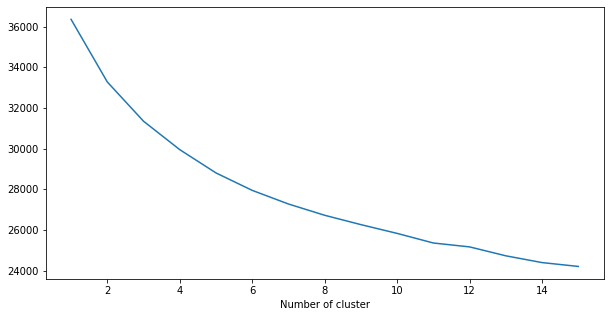

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

uhmm, não está muito claro, mas parece ser por volta de de 9, isso é muito! vamos tentar um teste de silhouette agora.

In [33]:
for nc in range(2, 16):
  print('Numero de grupos', nc)
  kmeans = KMeans(n_clusters=nc)
  kmeans.fit(df_nor)
  ss = silhouette_score(df_nor, kmeans.labels_)
  print('Silhouette Score:', ss)
  print('-'*30)

Numero de grupos 2
Silhouette Score: 0.4699827618237123
------------------------------
Numero de grupos 3
Silhouette Score: 0.39618921907683463
------------------------------
Numero de grupos 4
Silhouette Score: 0.33134305903408295
------------------------------
Numero de grupos 5
Silhouette Score: 0.2734975607894062
------------------------------
Numero de grupos 6
Silhouette Score: 0.24918906193113297
------------------------------
Numero de grupos 7
Silhouette Score: 0.23044876602103975
------------------------------
Numero de grupos 8
Silhouette Score: 0.23000444770533593
------------------------------
Numero de grupos 9
Silhouette Score: 0.22400016949552992
------------------------------
Numero de grupos 10
Silhouette Score: 0.22471585433749766
------------------------------
Numero de grupos 11
Silhouette Score: 0.2289187588973534
------------------------------
Numero de grupos 12
Silhouette Score: 0.23703188828315974
------------------------------
Numero de grupos 13
Silhouette S

aqui, usar apenas 2 clusters resultou na maior nota, com 7 chegando bem perto também. estranho.

vamos olhar diretamente para os dados clusterizados em 7 grupos e ver o que ele nos diz.

In [34]:
kmeans = KMeans(n_clusters=7, max_iter=1000).fit(df_nor)

In [35]:
# aqui vou usar o df original sem normalizações, para ficar mais legível
df["clusters"] = kmeans.labels_
df.groupby('clusters').describe()

count_eventos                                                        recencia                                                     duracao                                                   frequencia                                              
                 count        mean         std  min   25%   50%   75%     max    count       mean        std  min   25%   50%    75%   max   count       mean        std  min  25%  50%   75%    max      count      mean       std  min  25%  50%  75%   max
clusters                                                                                                                                                                                                                                                     
0                808.0   15.698020   35.728883  1.0  3.00   6.0  14.0   483.0    808.0  42.077970  24.411438  0.0  20.0  41.0  64.00  84.0   808.0   2.887376  12.226931  0.0  0.0  0.0   0.0   98.0      808.0  1.443069  2.447815  1.0  1.0  1.0  1.0  40.0
1               1115.0   33.680717  128.569000  1.0  3.00   7.0  18.5  1986.0   1115.0  47.254709  18.608980  1.0  34.0  46.0  62.00  84.0  1115.0   2.811659   9.555021  0.0  0.0  0.0   0.0   82.0     1115.0  1.619731  2.884797  1.0  1.0  1.0  1.0  47.0
2               1697.0   84.296405  221.242591  1.0  7.00  20.0  79.0  5793.0   1697.0  16.704184  17.230668  0.0   6.0  13.0  21.00  84.0  1697.0  17.899234  27.642745  0.0  0.0  0.0  28.0  100.0     1697.0  4.015321  6.660553  1.0  1.0  1.0  4.0  63.0
3               1045.0   93.978947  219.148622  1.0  9.00  29.0  93.0  3668.0   1045.0  34.808612  21.060389  0.0  19.0  34.0  51.00  83.0  1045.0  15.741627  23.763809  0.0  0.0  2.0  25.0  100.0     1045.0  3.962679  6.338137  1.0  1.0  2.0  4.0  56.0
4               1035.0   30.246377   86.174984  1.0  4.00  10.0  28.0  1324.0   1035.0  45.085024  17.620119  0.0  33.0  44.0  57.00  84.0  1035.0   3.251208  11.023655  0.0  0.0  0.0   0.0   99.0     1035.0  1.590338  2.056340  1.0  1.0  1.0  1.0  31.0
5                898.0  106.485523  277.081739  1.0  9.25  37.0  98.0  4296.0    898.0  50.973274  19.087003  0.0  35.0  51.0  69.00  83.0   898.0  10.377506  16.847437  0.0  0.0  1.0  14.0   82.0      898.0  3.013363  3.652375  1.0  1.0  2.0  3.0  40.0
6               1494.0   87.445783  297.189691  1.0  6.00  15.0  55.0  8287.0   1494.0  42.431727  25.646634  0.0  20.0  41.0  67.75  84.0  1494.0  11.172021  21.705679  0.0  0.0  0.0  11.0   98.0     1494.0  3.135207  5.422577  1.0  1.0  1.0  3.0  45.0

no olho é difícil dizer, mas parecem ter muitos grupos, muitos clusters são muito parecidos.

vamos olhar agora só para 2 e ver no que dá.

In [36]:
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(df_nor)

In [37]:
# aqui vou usar o df original sem normalizações, para ficar mais legível
df["clusters"] = kmeans.labels_
df.groupby('clusters').describe()

count_eventos                                                      recencia                                                    duracao                                                   frequencia                                              
                 count       mean         std  min  25%   50%   75%     max    count       mean        std  min   25%   50%   75%   max   count       mean        std  min  25%  50%   75%    max      count      mean       std  min  25%  50%  75%   max
clusters                                                                                                                                                                                                                                                  
0               3195.0  52.290141  157.207876  1.0  4.0  12.0  37.0  3668.0   3195.0  42.481064  19.891641  0.0  29.0  42.0  57.0  84.0  3195.0   7.183099  17.070867  0.0  0.0  0.0   3.0  100.0     3195.0  2.376526  4.315734  1.0  1.0  1.0  2.0  56.0
1               4897.0  78.007556  242.890260  1.0  6.0  15.0  61.0  8287.0   4897.0  35.024096  25.619016  0.0  13.0  29.0  57.0  84.0  4897.0  11.990606  22.615641  0.0  0.0  0.0  12.0  100.0     4897.0  3.138656  5.339435  1.0  1.0  1.0  3.0  63.0

mesmo com apenas 2 clusters os grupos estão muito parecidos e com desvios padrões muito altos. isso não parece estar funcionando.

### e se eu fizer a mesma coisa porém só com RFDV?

In [38]:
sse={}

In [39]:
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_num_nor)
    df_num_nor["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

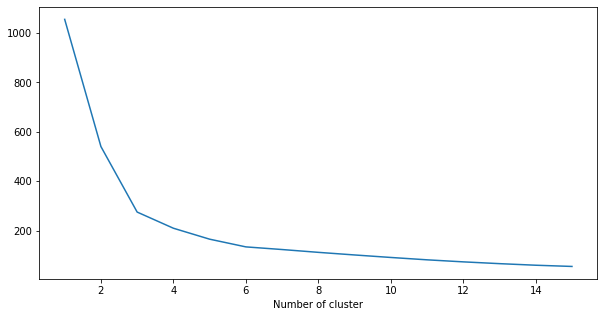

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [41]:
for nc in range(2, 20):
  print('Numero de grupos', nc)
  kmeans = KMeans(n_clusters=nc)
  kmeans.fit(df_num_nor)
  ss = silhouette_score(df_num_nor, kmeans.labels_)
  print('Silhouette Score:', ss)
  print('-'*30)

Numero de grupos 2
Silhouette Score: 0.6160201766576446
------------------------------
Numero de grupos 3
Silhouette Score: 0.6726737109117189
------------------------------
Numero de grupos 4
Silhouette Score: 0.6555520041240743
------------------------------
Numero de grupos 5
Silhouette Score: 0.6905341093224527
------------------------------
Numero de grupos 6
Silhouette Score: 0.7179365160800352
------------------------------
Numero de grupos 7
Silhouette Score: 0.7620882197469907
------------------------------
Numero de grupos 8
Silhouette Score: 0.7615269553704959
------------------------------
Numero de grupos 9
Silhouette Score: 0.7773173272045741
------------------------------
Numero de grupos 10
Silhouette Score: 0.8128005144682859
------------------------------
Numero de grupos 11
Silhouette Score: 0.854958886920252
------------------------------
Numero de grupos 12
Silhouette Score: 0.8741064427421651
------------------------------
Numero de grupos 13
Silhouette Score: 0.8

novamente uma grande diferença entre o teste de cotovelo e o de silhueta, e agora o de silhueta está bem estranho, apontando para 15 grupos.

In [42]:
kmeans = KMeans(n_clusters=4, max_iter=1000).fit(df_num_nor)

In [43]:
# de novo joguei os clusters direto no DF pré-normalização para não ter que fazer o inverse_transform
df_num["clusters"] = kmeans.labels_

In [44]:
df_num.groupby('clusters').describe()

count_eventos                                                       recencia                                                     duracao                                                   frequencia                                              
                 count       mean         std  min  25%   50%    75%     max    count       mean        std   min   25%   50%   75%   max   count       mean        std  min  25%  50%   75%    max      count      mean       std  min  25%  50%  75%   max
clusters                                                                                                                                                                                                                                                    
0               2256.0  88.222518  296.350721  1.0  5.0  14.0  63.00  8287.0   2256.0  42.462766  15.342055   0.0  40.0  47.0  54.0  60.0  2256.0  15.172872  27.541982  0.0  0.0  0.0   9.0   98.0     2256.0  3.273936  4.744034  1.0  1.0  1.0  3.0  36.0
1               2979.0  45.891910  152.196242  1.0  4.0  10.0  30.00  3668.0   2979.0  34.376301  27.655678   0.0  12.0  30.0  38.0  84.0  2979.0   3.963746  15.754625  0.0  0.0  0.0   0.0  100.0     2979.0  2.502182  6.411948  1.0  1.0  1.0  1.0  63.0
2               1299.0  72.989222  187.194764  1.0  6.0  16.0  59.50  2885.0   1299.0  59.000000  13.804155  21.0  54.5  64.0  69.0  73.0  1299.0   8.163972  11.868309  0.0  0.0  0.0  16.0   49.0     1299.0  2.497306  2.695762  1.0  1.0  1.0  3.0  22.0
3               1558.0  76.068678  186.297687  1.0  8.0  25.0  85.75  4296.0   1558.0  20.793325  16.242017   0.0  12.0  20.0  23.0  77.0  1558.0  16.062259  19.899861  0.0  0.0  6.0  28.0   80.0     1558.0  3.131579  3.258113  1.0  1.0  2.0  4.0  26.0

parece um pouco melhor, mas o desvio padrão ainda está muito alto comparado com as médias, especialmente no count_eventos.

### vamos tentar ver quantos clusters deveriam ter cada feature em separado

primeiro, a Recência.

In [46]:
df_num_nor.head()

,count_eventos,recencia,duracao,frequencia,clusters
0,1.000000,0.178571,0.81,0.032258,10
1,0.699010,0.083333,0.76,0.193548,10
2,0.518344,0.809524,0.10,0.145161,4
3,0.442554,0.000000,0.93,0.564516,1
4,0.410572,0.488095,0.43,0.177419,11


In [67]:
df_r = pd.DataFrame(df_num_nor['recencia'])

In [68]:
df_r.head()

,recencia
0,0.178571
1,0.083333
2,0.809524
3,0.000000
4,0.488095


In [69]:
sse={}

In [70]:
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_r)
    df_r["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

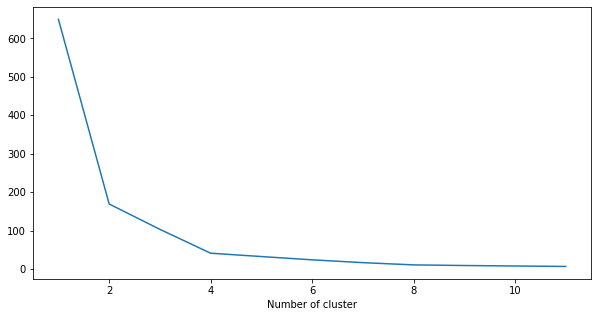

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

Aqui parece que o número correto de clusters é 5, ao invés de 4 do original, ainda assim bastante próximo.

agora com a Frequência.

In [73]:
df_f = pd.DataFrame(df_num_nor['frequencia'])

In [76]:
sse={}

In [77]:
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_f)
    df_f["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

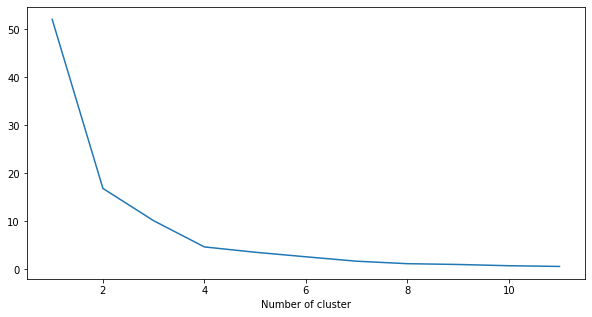

In [78]:
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

aqui também deu cerca de 5 clusters.

agora para a Duração.

In [79]:
df_d = pd.DataFrame(df_num_nor['duracao'])

In [80]:
sse={}

In [81]:
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_d)
    df_d["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

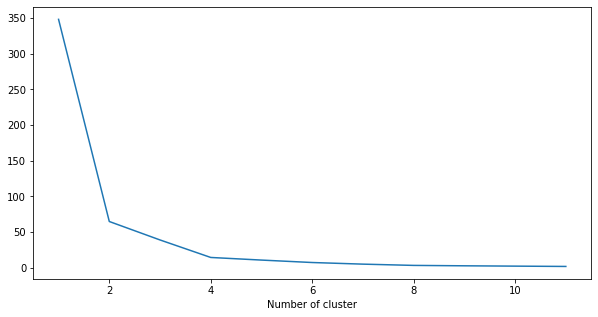

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

agora mais próximo de 3 do que de 5, mas ainda poderia ser 5, isso mostra que as três features que temos que são relacionadas a tempo podem ser agrupadas juntas.

agora para o último, o Volume.

In [84]:
df_v = pd.DataFrame(df_num_nor['count_eventos'])

In [85]:
sse={}

In [86]:
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_v)
    df_v["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

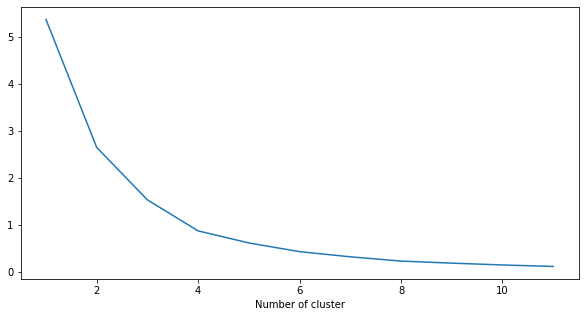

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

um pouco diferente a curva, mas ainda 5 clusters!